In [1]:
#安装ChatGLM2-6B
!pip install protobuf
!pip install transformers==4.30.2
!pip install cpm_kernels
!pip install torch>=2.0
!pip install gradio
!pip install mdtex2html
!pip install sentencepiece
!pip install accelerate
!pip install sse-starlette
!pip install streamlit>=1.24.0

#finetune
!pip install -U accelerate
!pip install datasets
!pip install -U peft
!pip install -U torchkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 65.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 123.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 82.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.6/416.6 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.9/19.9 MB 82.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.2/294.2 kB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.8 MB/s eta 0:

In [2]:
from transformers import  AutoModel,AutoTokenizer
model_name = 'THUDM/chatglm2-6b'
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
model = AutoModel.from_pretrained(model_name,trust_remote_code=True).cuda()

A new version of the following files was downloaded from https://huggingface.co/THUDM/chatglm2-6b:
- tokenization_chatglm.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


A new version of the following files was downloaded from https://huggingface.co/THUDM/chatglm2-6b:
- configuration_chatglm.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


A new version of the following files was downloaded from https://huggingface.co/THUDM/chatglm2-6b:
- quantization.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/THUDM/chatglm2-6b:
- modeling_chatglm.py
- quantization.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

In [3]:
# define a basic prompt for express comment
# prompt template with 3shots ahead

prompt = """
谣言验证任务：对下列网络文本进行谣言分析。您需要：
1. 使用逻辑链条的方式分析其真伪。
2. 逐步提供验证的逻辑思路。
3. 根据逻辑分析，将文本归类为：'尚无定论'、'证实为不真实'、'确实如此' 三种类型之一。
4. 确保回答以 "结论：xxxx" 结尾，其中xxxx为上述三种类型之一。

范例：
A型血更易感染新冠肺炎，O型血不易感 -> 研究尚未被同行评议，因此不应被视为确切的指导。研究指出血型与感染的相关性，但不能确定因果关系。该研究的对照数据是之前对武汉市的历史数据，这可能并不准确。即使血型与感染有关，也不能用来指导防疫。结论：尚无定论。

请分析下列文本：
xxxxxx ->
"""

# replace query with real content

def get_prompt(text):
    return prompt.replace('xxxxxx',text)

In [4]:
# try for once and test model workable
response, his = model.chat(tokenizer, get_prompt('戴口罩可以吹灭蜡烛打火机火苗，说明口罩不合格'), history=[])
print(response)
# print(his)

1. 使用逻辑链条的方式分析其真伪：
该文本声称戴口罩可以吹灭蜡烛和打火机火苗，从而说明口罩不合格。然而，这个结论缺乏明确的证据支持。虽然戴口罩可能有助于减少病毒传播，但这个文本没有提供足够的信息来证明口罩会导致火苗熄灭。此外，这个文本也没有提供任何关于口罩质量或可靠性的信息，因此我们无法判断口罩是否合格。
2. 逐步提供验证的逻辑思路：
要验证这个文本是否为谣言，我们需要寻找相关的证据来支持或反驳这个结论。我们可以进行以下步骤：
a. 查找有关口罩和火苗相互作用的科学研究，看看是否有证据表明戴口罩可以吹灭蜡烛或打火机火苗。
b. 查找口罩质量和可靠性的相关信息，以确定其是否符合生产标准。
c. 查找有关蜡烛和打火机火苗相互作用的相关研究，以确定是否有证据表明戴口罩可以吹灭火苗。
3. 根据逻辑分析，将文本归类为：'尚无定论'、'证实为不真实'、'确实如此' 三种类型之一：
根据我们的分析，这个文本缺乏足够的证据来证明戴口罩可以吹灭蜡烛或打火机火苗，因此我们将其归类为'尚无定论'。


- 为了减少模型的指引难度，减少shot的内容

In [5]:
# add new history comment as new shots
# his.append(("合格的口罩会吸附大量纸屑，反之就是不合格的口罩 -> ","因为在结构完整的情况下，口罩能吸附大量纸屑，主要是靠外层的纺粘布实现的。但真口罩和假口罩最核心的区别在于中间是否有熔喷层（熔喷层是要通过驻极工艺加上静电，静电主要是用来吸附颗粒的）。而熔喷层有静电，不等于口罩外层也有静电。打个比方，我们都知道香蕉肉是甜的，但这不等于说香蕉皮也是甜的，如果不甜就是假香蕉。 事实上，要让口罩外层吸附纸屑很简单，摩擦产生静电即可，但这完全无法说明口罩里是否有熔喷层，以及熔喷层工艺是否合格。结论：证实为不真实"))
# now we got 6 shots
print(his)

[('\n谣言验证任务：对下列网络文本进行谣言分析。您需要：\n1. 使用逻辑链条的方式分析其真伪。\n2. 逐步提供验证的逻辑思路。\n3. 根据逻辑分析，将文本归类为：\'尚无定论\'、\'证实为不真实\'、\'确实如此\' 三种类型之一。\n4. 确保回答以 "结论：xxxx" 结尾，其中xxxx为上述三种类型之一。\n\n范例：\nA型血更易感染新冠肺炎，O型血不易感 -> 研究尚未被同行评议，因此不应被视为确切的指导。研究指出血型与感染的相关性，但不能确定因果关系。该研究的对照数据是之前对武汉市的历史数据，这可能并不准确。即使血型与感染有关，也不能用来指导防疫。结论：尚无定论。\n\n请分析下列文本：\n戴口罩可以吹灭蜡烛打火机火苗，说明口罩不合格 ->\n', "1. 使用逻辑链条的方式分析其真伪：\n该文本声称戴口罩可以吹灭蜡烛和打火机火苗，从而说明口罩不合格。然而，这个结论缺乏明确的证据支持。虽然戴口罩可能有助于减少病毒传播，但这个文本没有提供足够的信息来证明口罩会导致火苗熄灭。此外，这个文本也没有提供任何关于口罩质量或可靠性的信息，因此我们无法判断口罩是否合格。\n2. 逐步提供验证的逻辑思路：\n要验证这个文本是否为谣言，我们需要寻找相关的证据来支持或反驳这个结论。我们可以进行以下步骤：\na. 查找有关口罩和火苗相互作用的科学研究，看看是否有证据表明戴口罩可以吹灭蜡烛或打火机火苗。\nb. 查找口罩质量和可靠性的相关信息，以确定其是否符合生产标准。\nc. 查找有关蜡烛和打火机火苗相互作用的相关研究，以确定是否有证据表明戴口罩可以吹灭火苗。\n3. 根据逻辑分析，将文本归类为：'尚无定论'、'证实为不真实'、'确实如此' 三种类型之一：\n根据我们的分析，这个文本缺乏足够的证据来证明戴口罩可以吹灭蜡烛或打火机火苗，因此我们将其归类为'尚无定论'。")]


In [6]:
# based on new shots to make prediction
# response, his = model.chat(tokenizer, "新冠肺炎患者的母乳中有新冠病毒 -> ", history=his)
# print(response) # ground truth 为尚无定论

response, his = model.chat(tokenizer, "新冠病毒会在夏季自行消失 -> ", history=his)
print(response)  # ground truth 为尚无定论

# response, his = model.chat(tokenizer, "宠物狗会传播新型冠状病毒 -> ", history=his)
# print(response)  # ground truth 为尚无定论

1. 使用逻辑链条的方式分析其真伪：
该文本声称新冠病毒会在夏季自行消失，但没有提供任何支持这个结论的证据。新冠病毒是一种高度传染性的病毒，全球范围内已经造成了数百万人的死亡和数千万人的感染。尽管疫苗的研发和推广取得了一定的进展，但是新冠病毒的变异和传播速度仍然是一个严峻的挑战。因此，我们无法确定新冠病毒是否会自行消失，也不能将其归类为谣言。
2. 逐步提供验证的逻辑思路：
要验证这个文本是否为谣言，我们需要寻找相关的证据来支持或反驳这个结论。然而，目前并没有证据表明新冠病毒会在夏季自行消失。因此，我们需要更多的科学研究和数据来回答这个问题。
3. 根据逻辑分析，将文本归类为：'尚无定论'、'证实为不真实'、'确实如此' 三种类型之一：
根据我们的分析，这个文本缺乏足够的证据来证明新冠病毒会在夏季自行消失，因此我们将其归类为'尚无定论'。


In [7]:
# define a function for above
# only return prediction result rather than result & history
def predict(text):
    response, history = model.chat(tokenizer, get_prompt(text), history=his,
    temperature=0.01)
    return response

predict('服用阿司匹林能预防新冠肺炎感染') # try for once and got a incompatiable result

"1. 使用逻辑链条的方式分析其真伪：\n该文本声称服用阿司匹林可以预防新冠肺炎感染，但没有提供任何支持这个结论的证据。目前还没有足够的证据表明阿司匹林可以预防新冠肺炎感染。此外，服用阿司匹林可能会有副作用，包括胃肠道出血等严重后果。因此，这个文本缺乏足够的证据来证明服用阿司匹林可以预防新冠肺炎感染，我们将其归类为'尚无定论'。\n2. 逐步提供验证的逻辑思路：\n要验证这个文本是否为谣言，我们需要寻找相关的证据来支持或反驳这个结论。我们可以进行以下步骤：\na. 查找有关阿司匹林和新冠肺炎预防的相关科学研究，看看是否有证据表明阿司匹林可以预防新冠肺炎感染。\nb. 查找有关阿司匹林的副作用和风险的相关信息，以确定其是否可以安全使用。\n3. 根据逻辑分析，将文本归类为：'尚无定论'、'证实为不真实'、'确实如此' 三种类型之一：\n根据我们的分析，这个文本缺乏足够的证据来证明服用阿司匹林可以预防新冠肺炎感染，因此我们将其归类为'尚无定论'。"

In [8]:
import pandas as pd
import numpy as np
import datasets
import json


df = pd.read_json('/content/drive/MyDrive/Rumor_Datasets/fact_updated.json', lines=True)
df.head()


,date,explain,tag,abstract,title,rumor
0,2020-03-18,尚无定论,"['新型冠状病毒', '易感人群']",研究没有正式发表，没有经过同行评议，所以不应被视为结论性的、指导临床实践/健康相关行为的信息...,A型血更易感染新冠肺炎，O型血不易感,南方科技大学、上海交大、武汉中南医院、武汉金银潭医院等8家单位的最新研究显示：A、B、O、A...
1,2020-03-16,证实为不真实,"['新型冠状病毒', '传染病']",我们常见的疾病，比如感冒、流感、病毒性肺炎主要是通过咳嗽、喷嚏以及空气播散的飞沫在人际间传播...,日本医生建议：大量喝水保持喉咙湿润，预防新冠病毒,日本医生在治疗COVID-19病例时给予的绝妙建议： 每个人都应确保您的口腔和咽喉湿润，永不...
2,2020-03-12,证实为不真实,"['口罩', '蜡烛']",口罩的种类繁多。一部分对于防护性能要求较高的口罩，比如N95、N99等，为了保证防护性，往往...,戴口罩可以吹灭蜡烛打火机火苗，说明口罩不合格,戴口罩可以吹灭火苗，说明口罩不合格，是真的吗？——来自较真用户@疯星星提问
3,2020-03-11,证实为不真实,"['口罩', '吸附纸屑']",在结构完整的情况下，口罩能吸附大量纸屑，主要是靠外层的纺粘布实现的。但真口罩和假口罩最核心的...,合格的口罩会吸附大量纸屑，反之就是不合格的口罩,网上说口罩能吸附小纸片就是合格口罩是吗——来自较真用户@倩的提问。
4,2020-03-10,证实为不真实,"['新型冠状病毒', '阿昔洛韦']",阿昔洛韦是1977年由Elion等人首次设计并合成的无环核苷类似物，并于1981年上市，此后...,抗病毒药阿昔洛韦能有效预防新冠肺炎,网传阿昔洛韦这一款抗病毒药可以有效预防新型冠状病毒肺炎。


In [9]:
df = df.drop(columns=['date', 'tag','title'])
df = df.rename(columns={'explain': 'target'})
df.head()

,target,abstract,rumor
0,尚无定论,研究没有正式发表，没有经过同行评议，所以不应被视为结论性的、指导临床实践/健康相关行为的信息...,南方科技大学、上海交大、武汉中南医院、武汉金银潭医院等8家单位的最新研究显示：A、B、O、A...
1,证实为不真实,我们常见的疾病，比如感冒、流感、病毒性肺炎主要是通过咳嗽、喷嚏以及空气播散的飞沫在人际间传播...,日本医生在治疗COVID-19病例时给予的绝妙建议： 每个人都应确保您的口腔和咽喉湿润，永不...
2,证实为不真实,口罩的种类繁多。一部分对于防护性能要求较高的口罩，比如N95、N99等，为了保证防护性，往往...,戴口罩可以吹灭火苗，说明口罩不合格，是真的吗？——来自较真用户@疯星星提问
3,证实为不真实,在结构完整的情况下，口罩能吸附大量纸屑，主要是靠外层的纺粘布实现的。但真口罩和假口罩最核心的...,网上说口罩能吸附小纸片就是合格口罩是吗——来自较真用户@倩的提问。
4,证实为不真实,阿昔洛韦是1977年由Elion等人首次设计并合成的无环核苷类似物，并于1981年上市，此后...,网传阿昔洛韦这一款抗病毒药可以有效预防新型冠状病毒肺炎。


In [10]:
# 将Pandas DataFrame对象转换为Hugging Face Dataset对象
# 将数据集划分为训练集和测试集
# 数据集还是太小了，容易产生过拟合
# test_size: 指定测试集的大小。在这个例子中，测试集的大小是31，这意味着31个样本将被用于测试集
# 已知完整的数据集一共包括124个案例，因此有93个训练集
# shuffle: 如果设置为True，数据集在划分之前会被打乱，可以确保训练集和测试集是随机抽样的，从而避免因样本排序引起的偏差
# seed: 设置随机数生成器的种子，用于控制随机打乱的过程，确保结果是可复制的。在这里，种子被设置为43，你也可以设置为其他的数字
ds_dic = datasets.Dataset.from_pandas(df).train_test_split(
    test_size = 31,shuffle=True, seed = 43)
dftrain = ds_dic['train'].to_pandas() # 将训练集转化为pandas
dftest = ds_dic['test'].to_pandas() # 将验证集转化为pandas
# 用于将DataFrame对象保存为Parquet格式的文件
dftrain.to_parquet('dftrain.parquet')
dftest.to_parquet('dftest.parquet')

In [11]:
preds = ['' for x in dftest['target']] # 基于测试集的长度创建一个新的数组，用于存储测试的结果
print(len(preds))

31


In [12]:
dftest['pred'] = preds
dftest.head()

,target,abstract,rumor,pred
0,确实如此,“北京即将封城”、“1月26日晚白岩松将邀请钟南山院士介绍疫情”、“钟南山院士建议：全中国人...,吃大蒜能抗病毒？盐水漱口可以防病毒？燃放烟花可以预防瘟疫？这些关于新型冠状病毒肺炎的说法你信了吗？,
1,证实为不真实,钟南山院士并未给出盐水漱口防病毒的建议，广州医科大学附属第一医院已经辟谣。 在生活中我们用盐...,网友大量转发如下建议： 呼吁各位去医院或其他公共场合之前用淡盐水漱一下咽喉部位，回家后再漱一...,
2,证实为不真实,N95口罩的使用，美国疾控中心发布了一个文件，指出在特殊情况下（比如口罩供应不足等），可以在...,N95口罩用7天后不要丢，用大功率吹风机吹30分钟，或者有酒精的喷一下消毒后继续用。,
3,证实为不真实,目前市场上所有号称增强免疫力的药物/保健品都缺乏临床依据，比如益生菌、冻干粉等，蘑菇多糖亦是...,好的蘑菇如花菇含有丰富的多糖类物质，可以刺激免疫系统，提高免疫力，对抗新型冠状病毒。,
4,确实如此,2020年1月24日，中国医生和科学家关于新型冠状病毒肺炎的诊断治疗经验已经发表在国际顶尖医...,这次新型肺炎虽然传染很厉害，但是目前已经能够很好地治疗，大部分患者2-4周就可以被治愈。,


In [13]:
import pandas as pd
import re
from tqdm import tqdm

# 假设 dftest 是一个 DataFrame
dftest['predict_target'] = ''  # 新增 predict_target 列，初始为空字符串

patterns = ['尚无定论', '证实为不真实', '确实如此']

for i in tqdm(range(len(dftest))):
    text = dftest['rumor'].iloc[i]
    prediction = predict(text)

    # 检查三种模式是否存在
    found = False
    for pattern in patterns:
        if pattern in prediction:
            dftest['predict_target'].iloc[i] = pattern
            found = True
            break  # 如果找到其中一个匹配，就跳出循环

    if not found:
        dftest['predict_target'].iloc[i] = '模型生成异常'


100%|██████████| 31/31 [04:11<00:00,  8.10s/it]


In [14]:
dftest['pred'] = preds
dftest.head()

,target,abstract,rumor,pred,predict_target
0,确实如此,“北京即将封城”、“1月26日晚白岩松将邀请钟南山院士介绍疫情”、“钟南山院士建议：全中国人...,吃大蒜能抗病毒？盐水漱口可以防病毒？燃放烟花可以预防瘟疫？这些关于新型冠状病毒肺炎的说法你信了吗？,,尚无定论
1,证实为不真实,钟南山院士并未给出盐水漱口防病毒的建议，广州医科大学附属第一医院已经辟谣。 在生活中我们用盐...,网友大量转发如下建议： 呼吁各位去医院或其他公共场合之前用淡盐水漱一下咽喉部位，回家后再漱一...,,尚无定论
2,证实为不真实,N95口罩的使用，美国疾控中心发布了一个文件，指出在特殊情况下（比如口罩供应不足等），可以在...,N95口罩用7天后不要丢，用大功率吹风机吹30分钟，或者有酒精的喷一下消毒后继续用。,,尚无定论
3,证实为不真实,目前市场上所有号称增强免疫力的药物/保健品都缺乏临床依据，比如益生菌、冻干粉等，蘑菇多糖亦是...,好的蘑菇如花菇含有丰富的多糖类物质，可以刺激免疫系统，提高免疫力，对抗新型冠状病毒。,,尚无定论
4,确实如此,2020年1月24日，中国医生和科学家关于新型冠状病毒肺炎的诊断治疗经验已经发表在国际顶尖医...,这次新型肺炎虽然传染很厉害，但是目前已经能够很好地治疗，大部分患者2-4周就可以被治愈。,,尚无定论


In [15]:
# dftest['pred'].iloc[0]

''

In [16]:
dftest.pivot_table(index='target',columns = 'pred',values='rumor',aggfunc='count')

pred,
target,
尚无定论,10
确实如此,5
证实为不真实,16


In [17]:
acc = len(dftest.query('target==predict_target'))/len(dftest) # 没有经过ft的model的accuracy为45%, 分数是很低的
print('accuracy=',acc)

accuracy= 0.3225806451612903


In [18]:
# 加载数据
import pandas as pd
import numpy as np
import datasets

dftrain = pd.read_parquet('dftrain.parquet')
dftest = pd.read_parquet('dftest.parquet')

In [19]:
dftrain.head()

,target,abstract,rumor
0,证实为不真实,有一些初步研究显示乳铁蛋白对于婴儿可能有一定的健康益处，被演绎成了“吃乳铁蛋白增强免疫力”，...,乳铁蛋白能提高免疫力，预防新型冠状病毒吗？——来自较真网友提问
1,尚无定论,通过“四名中/轻度患者出院后核酸检测又呈阳性”的案例，并不能直接得出“病毒能在康复者体内存留...,四名中轻度患者出院后核酸检测又呈阳性！有报道称，新型冠状病毒能在康复者体内存留数周，但传染力变弱。
2,尚无定论,非典时期，有报道称“洁尔阴”洗剂在体外1:100浓度下能抑制SARS病毒，在当时引起轰动，但...,纯天然中药制剂“洁尔阴”洗液能抑制SARS病毒，可预防非典。
3,确实如此,新型冠状病毒主要通过飞沫传播，在空调工作状态下飞沫活动范围会明显增大。 虽然目前尚未在空调中...,中央空调会传播病毒，是真的吗？——来自较真用户提问
4,确实如此,首先酒精喷到空气中是无效的。酒精雾化之后，会慢慢挥发，最后成为一个个分子飘散在空气中，这个时...,望各位周知，很重要！乙醇闪点12.78°C，火灾危险性属于甲类，75%乙醇消毒液闪点大约在2...


In [20]:
dftest.head()

,target,abstract,rumor
0,确实如此,“北京即将封城”、“1月26日晚白岩松将邀请钟南山院士介绍疫情”、“钟南山院士建议：全中国人...,吃大蒜能抗病毒？盐水漱口可以防病毒？燃放烟花可以预防瘟疫？这些关于新型冠状病毒肺炎的说法你信了吗？
1,证实为不真实,钟南山院士并未给出盐水漱口防病毒的建议，广州医科大学附属第一医院已经辟谣。 在生活中我们用盐...,网友大量转发如下建议： 呼吁各位去医院或其他公共场合之前用淡盐水漱一下咽喉部位，回家后再漱一...
2,证实为不真实,N95口罩的使用，美国疾控中心发布了一个文件，指出在特殊情况下（比如口罩供应不足等），可以在...,N95口罩用7天后不要丢，用大功率吹风机吹30分钟，或者有酒精的喷一下消毒后继续用。
3,证实为不真实,目前市场上所有号称增强免疫力的药物/保健品都缺乏临床依据，比如益生菌、冻干粉等，蘑菇多糖亦是...,好的蘑菇如花菇含有丰富的多糖类物质，可以刺激免疫系统，提高免疫力，对抗新型冠状病毒。
4,确实如此,2020年1月24日，中国医生和科学家关于新型冠状病毒肺炎的诊断治疗经验已经发表在国际顶尖医...,这次新型肺炎虽然传染很厉害，但是目前已经能够很好地治疗，大部分患者2-4周就可以被治愈。


In [22]:
dftrain['target'].value_counts()

证实为不真实    46
尚无定论      33
确实如此      14
Name: target, dtype: int64

In [23]:
# 将上下文整理成与推理时候一致，参照model.chat中的源码
def build_inputs(query, history):
    prompt = ""
    for i, (old_query, response) in enumerate(history):
        prompt += "[Round {}]\n\n问：{}\n\n答：{}\n\n".format(i + 1, old_query, response) # history中的第几轮次，问了什么，得到了什么答案
    prompt += "[Round {}]\n\n问：{} -> \n\n答：".format(len(history) + 1, query) # 当前轮次，当前问话
    return prompt

In [24]:
print(build_inputs('服用杀虫剂可以杀灭新冠病毒',history=his))

[Round 1]

问：
谣言验证任务：对下列网络文本进行谣言分析。您需要：
1. 使用逻辑链条的方式分析其真伪。
2. 逐步提供验证的逻辑思路。
3. 根据逻辑分析，将文本归类为：'尚无定论'、'证实为不真实'、'确实如此' 三种类型之一。
4. 确保回答以 "结论：xxxx" 结尾，其中xxxx为上述三种类型之一。

范例：
A型血更易感染新冠肺炎，O型血不易感 -> 研究尚未被同行评议，因此不应被视为确切的指导。研究指出血型与感染的相关性，但不能确定因果关系。该研究的对照数据是之前对武汉市的历史数据，这可能并不准确。即使血型与感染有关，也不能用来指导防疫。结论：尚无定论。

请分析下列文本：
戴口罩可以吹灭蜡烛打火机火苗，说明口罩不合格 ->


答：1. 使用逻辑链条的方式分析其真伪：
该文本声称戴口罩可以吹灭蜡烛和打火机火苗，从而说明口罩不合格。然而，这个结论缺乏明确的证据支持。虽然戴口罩可能有助于减少病毒传播，但这个文本没有提供足够的信息来证明口罩会导致火苗熄灭。此外，这个文本也没有提供任何关于口罩质量或可靠性的信息，因此我们无法判断口罩是否合格。
2. 逐步提供验证的逻辑思路：
要验证这个文本是否为谣言，我们需要寻找相关的证据来支持或反驳这个结论。我们可以进行以下步骤：
a. 查找有关口罩和火苗相互作用的科学研究，看看是否有证据表明戴口罩可以吹灭蜡烛或打火机火苗。
b. 查找口罩质量和可靠性的相关信息，以确定其是否符合生产标准。
c. 查找有关蜡烛和打火机火苗相互作用的相关研究，以确定是否有证据表明戴口罩可以吹灭火苗。
3. 根据逻辑分析，将文本归类为：'尚无定论'、'证实为不真实'、'确实如此' 三种类型之一：
根据我们的分析，这个文本缺乏足够的证据来证明戴口罩可以吹灭蜡烛或打火机火苗，因此我们将其归类为'尚无定论'。

[Round 2]

问：新冠病毒会在夏季自行消失 -> 

答：1. 使用逻辑链条的方式分析其真伪：
该文本声称新冠病毒会在夏季自行消失，但没有提供任何支持这个结论的证据。新冠病毒是一种高度传染性的病毒，全球范围内已经造成了数百万人的死亡和数千万人的感染。尽管疫苗的研发和推广取得了一定的进展，但是新冠病毒的变异和传播速度仍然是一个严峻的挑战。因此，我们无法确定新冠病毒是否会自行消失，也不能将其归类为谣言。
2. 逐步提供验证的逻

In [28]:
reverse_prompt = """
谣言拆解任务：以下提供的是一段完整的网络文本谣言分析。请您按照以下步骤对其进行拆解：
1. 识别并总结整体的逻辑链条，描述文本的真伪验证方式。
2. 逐步提取分析中的逻辑思路，列出每个步骤的验证内容。

范例：
完整分析：研究尚未被同行评议，因此不应被视为确切的指导。研究指出血型与感染的相关性，但不能确定因果关系。该研究的对照数据是之前对武汉市的历史数据，这可能并不准确。即使血型与感染有关，也不能用来指导防疫。结论：尚无定论。
拆解结果：
1. 使用对研究是否被同行评议、研究内容及对照数据的检验方式分析其真伪。
2.
   - 研究尚未被同行评议，因此不应被视为确切的指导。
   - 研究指出血型与感染的相关性，但不能确定因果关系。
   - 该研究的对照数据是之前对武汉市的历史数据，这可能并不准确。
   - 即使血型与感染有关，也不能用来指导防疫。

请拆解下列完整分析：
xxxxxx ->

"""

# replace query with real content

def reverse_prompt_func(text):
    return reverse_prompt.replace('xxxxxx',text)

In [29]:
def reverse_predict(text):
    response, history = model.chat(tokenizer, reverse_prompt_func(text), history=[],
    temperature=0.01)
    return response

In [30]:
reverse_predict('研究没有正式发表，没有经过同行评议，所以不应被视为结论性的、指导临床实践\/健康相关行为的信息，也不应作为既定事实在新闻媒体报道。 “A、B、O、AB血型与新冠肺炎易感性存在关联”是一个流行病学的研究结果，表述的是血型与病毒感染的相关性，不能简单做出因果关系的解释，也不能过度解读研究结果。另外，该研究中用来作为参考的对照数据，是之前对武汉市3694名正常人的血型调查，这是一个历史数据，这个数据能否真正代表新冠肺炎患者“所属”人群本来应该有的血型分布？是不确定的。 即便血型与病毒感染有相关性，也不能用来指导防疫措施。如果与一个感染者进行了无保护的密切接触，O型血的人被感染仍然是一个大概率事件。')

'拆解结果：\n\n1. 研究未经过同行评议，不应被视为确切的指导。\n2. 血型与感染存在关联，但不能确定因果关系。\n3. 研究使用的对照数据是历史数据，可能不准确。\n4. 血型与感染的关系无法直接应用于防疫措施。\n5. 即使血型与感染有关，也不能简单地指导防疫措施。'

In [31]:
converted_abstract = ['' for x in dftrain['abstract']]
print(len(converted_abstract))
dftrain['converted_abstract'] = converted_abstract

93


In [32]:
from tqdm import tqdm
for i in tqdm(range(len(dftrain))):
    text = dftrain['abstract'].loc[i]
    converted_abstract[i] = reverse_predict(text)

dftrain['converted_abstract'] = converted_abstract
dftrain.head()

100%|██████████| 93/93 [07:26<00:00,  4.80s/it]


,target,abstract,rumor,converted_abstract
0,证实为不真实,有一些初步研究显示乳铁蛋白对于婴儿可能有一定的健康益处，被演绎成了“吃乳铁蛋白增强免疫力”，...,乳铁蛋白能提高免疫力，预防新型冠状病毒吗？——来自较真网友提问,拆解结果：\n1. 乳铁蛋白是一种蛋白质，最初的研究表明它可能对婴儿健康有益处。\n2. 随...
1,尚无定论,通过“四名中/轻度患者出院后核酸检测又呈阳性”的案例，并不能直接得出“病毒能在康复者体内存留...,四名中轻度患者出院后核酸检测又呈阳性！有报道称，新型冠状病毒能在康复者体内存留数周，但传染力变弱。,拆解结果：\n\n1. 该谣言文本未经过同行评议，因此无法验证其真伪。\n2. 研究结果表明...
2,尚无定论,非典时期，有报道称“洁尔阴”洗剂在体外1:100浓度下能抑制SARS病毒，在当时引起轰动，但...,纯天然中药制剂“洁尔阴”洗液能抑制SARS病毒，可预防非典。,拆解结果：\n\n1. 对研究是否为权威机构发布、研究内容是否确切进行了分析。\n2. 对研...
3,确实如此,新型冠状病毒主要通过飞沫传播，在空调工作状态下飞沫活动范围会明显增大。 虽然目前尚未在空调中...,中央空调会传播病毒，是真的吗？——来自较真用户提问,拆解结果：\n\n1. 对研究是否被同行评议、研究内容及对照数据的检验方式分析其真伪。\n\...
4,确实如此,首先酒精喷到空气中是无效的。酒精雾化之后，会慢慢挥发，最后成为一个个分子飘散在空气中，这个时...,望各位周知，很重要！乙醇闪点12.78°C，火灾危险性属于甲类，75%乙醇消毒液闪点大约在2...,拆解结果：\n1. 验证酒精喷雾的有效性：酒精喷到空气中并挥发后，无法有效地消毒，因此该说法...


In [33]:
converted_abstract_test = ['' for x in dftest['abstract']]
print(len(converted_abstract_test))
dftest['converted_abstract'] = converted_abstract_test

31


In [34]:
from tqdm import tqdm
for i in tqdm(range(len(dftest))):
    text = dftest['abstract'].loc[i]
    converted_abstract_test[i] = reverse_predict(text)

dftest['converted_abstract'] = converted_abstract_test
dftest.head()

100%|██████████| 31/31 [02:32<00:00,  4.93s/it]


,target,abstract,rumor,converted_abstract
0,确实如此,“北京即将封城”、“1月26日晚白岩松将邀请钟南山院士介绍疫情”、“钟南山院士建议：全中国人...,吃大蒜能抗病毒？盐水漱口可以防病毒？燃放烟花可以预防瘟疫？这些关于新型冠状病毒肺炎的说法你信了吗？,拆解结果：\n1. 验证文本中提到的“北京即将封城”是否属实。\n2. 验证文本中提到的“1...
1,证实为不真实,钟南山院士并未给出盐水漱口防病毒的建议，广州医科大学附属第一医院已经辟谣。 在生活中我们用盐...,网友大量转发如下建议： 呼吁各位去医院或其他公共场合之前用淡盐水漱一下咽喉部位，回家后再漱一...,拆解结果：\n\n1. 验证钟南山院士是否曾给出盐水漱口防病毒的建议：无\n2. 验证广州医...
2,证实为不真实,N95口罩的使用，美国疾控中心发布了一个文件，指出在特殊情况下（比如口罩供应不足等），可以在...,N95口罩用7天后不要丢，用大功率吹风机吹30分钟，或者有酒精的喷一下消毒后继续用。,拆解结果：\n1. 对研究是否由美国疾控中心发布进行验证。\n2. \n - 研究指出N...
3,证实为不真实,目前市场上所有号称增强免疫力的药物/保健品都缺乏临床依据，比如益生菌、冻干粉等，蘑菇多糖亦是...,好的蘑菇如花菇含有丰富的多糖类物质，可以刺激免疫系统，提高免疫力，对抗新型冠状病毒。,拆解结果：\n1. 对市场声称增强免疫力的药物/保健品缺乏临床依据进行验证。\n2. 验证增...
4,确实如此,2020年1月24日，中国医生和科学家关于新型冠状病毒肺炎的诊断治疗经验已经发表在国际顶尖医...,这次新型肺炎虽然传染很厉害，但是目前已经能够很好地治疗，大部分患者2-4周就可以被治愈。,拆解结果：\n1. 使用对研究是否被同行评议、研究内容及验证数据的检验方式分析其真伪。\n2...


In [38]:
dftrain['context'] = [build_inputs(x,history=his) for x in dftrain['rumor']] # 定义训练集中的上文
# dftrain['target'] = [x for x in dftrain['target']] # 定义训练集中的标签
dftrain['target'] = dftrain['converted_abstract'] + '因此我们将其归类为:' + dftrain['target']
dftrain = dftrain[['context','target']]

dftest['context'] = [build_inputs(x,history=his) for x in dftest['rumor']]
dftest['target'] = dftest['converted_abstract'] + '因此我们将其归类为:' + dftest['target']
# dftest['target'] = [x for x in dftest['target']]
dftest = dftest[['context','target']]

In [39]:
# 将pandas的dataset转化为hf的dataset
ds_train = datasets.Dataset.from_pandas(dftrain)
ds_val = datasets.Dataset.from_pandas(dftest)

In [40]:
# 将输入的文本转化为token也就是Tokenizer
# context转化成context_ids，把target转化成target_ids
# 将context_ids和target_ids拼接到一起作为模型的input_ids

from tqdm import tqdm
import transformers

model_name = "THUDM/chatglm2-6b"
max_seq_length = 2048
skip_over_length = True

# 载入模型的Tokenizer
tokenizer = transformers.AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
# 载入模型的参数
config = transformers.AutoConfig.from_pretrained(model_name, trust_remote_code=True, device_map='auto')
# 定义预处理流程
def preprocess(example):
    context = example["context"]
    target = example["target"]
    # 将context转化为id 超长就截取
    context_ids = tokenizer.encode(
            context,
            max_length=max_seq_length,
            truncation=True)
    # 将target也转化为id
    target_ids = tokenizer.encode(
        target,
        max_length=max_seq_length,
        truncation=True,
        add_special_tokens=False)
    # 将上述两者的id拼接 + 配置文件中end of sentence 的id
    input_ids = context_ids + target_ids + [config.eos_token_id]
    # -100标志位后面会在计算loss时会被忽略不贡献损失，我们集中优化target部分生成的loss
    labels = [-100]*len(context_ids)+ target_ids + [config.eos_token_id]

    return {"input_ids": input_ids,
            "labels": labels,
            "context_len": len(context_ids),
            'target_len':len(target_ids)+1}


In [41]:
ds_train_token = ds_train.map(preprocess).select_columns(['input_ids','labels', 'context_len','target_len'])
if skip_over_length:
    ds_train_token = ds_train_token.filter(
        lambda example: example["context_len"]<max_seq_length and example["target_len"]<max_seq_length)

Map:   0%|          | 0/93 [00:00<?, ? examples/s]

Filter:   0%|          | 0/93 [00:00<?, ? examples/s]

In [42]:
ds_val_token = ds_val.map(preprocess).select_columns(['input_ids', 'labels','context_len','target_len'])
if skip_over_length:
    ds_val_token = ds_val_token.filter(
        lambda example: example["context_len"]<max_seq_length and example["target_len"]<max_seq_length)

Map:   0%|          | 0/31 [00:00<?, ? examples/s]

Filter:   0%|          | 0/31 [00:00<?, ? examples/s]

In [43]:
import torch

def data_collator(examples: list):
    len_ids = [len(example["input_ids"]) for example in examples]
    longest = max(len_ids) #之后按照batch中最长的input_ids进行padding

    input_ids = []
    labels_list = []

    for length, example in sorted(zip(len_ids, examples), key=lambda x: -x[0]):
        ids = example["input_ids"]
        labs = example["labels"]

        ids = ids + [tokenizer.pad_token_id] * (longest - length)
        labs = labs + [-100] * (longest - length)

        input_ids.append(torch.LongTensor(ids))
        labels_list.append(torch.LongTensor(labs))

    input_ids = torch.stack(input_ids)
    labels = torch.stack(labels_list)
    return {
        "input_ids": input_ids,
        "labels": labels,
    }

In [44]:
dl_train = torch.utils.data.DataLoader(ds_train_token,num_workers=2,batch_size=4,
                                       pin_memory=True,shuffle=True,
                                       collate_fn = data_collator)
dl_val = torch.utils.data.DataLoader(ds_val_token,num_workers=2,batch_size=4,
                                    pin_memory=True,shuffle=True,
                                     collate_fn = data_collator)

In [45]:
for batch in dl_train:
    break

In [46]:
batch

{'input_ids': tensor([[64790, 64792,   790,  ..., 54535, 32558,     2],
         [64790, 64792,   790,  ...,     0,     0,     0],
         [64790, 64792,   790,  ...,     0,     0,     0],
         [64790, 64792,   790,  ...,     0,     0,     0]]),
 'labels': tensor([[ -100,  -100,  -100,  ..., 54535, 32558,     2],
         [ -100,  -100,  -100,  ...,  -100,  -100,  -100],
         [ -100,  -100,  -100,  ...,  -100,  -100,  -100],
         [ -100,  -100,  -100,  ...,  -100,  -100,  -100]])}

In [47]:
dl_train.size = 10 #用约300个step做一次验证

In [48]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
# 检查设备后开始训练
# for colab tricky issue
# https://github.com/googlecolab/colabtools/issues/3409
!nvidia-smi

Mon Jul 31 00:36:00 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    50W / 400W |  14057MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [49]:
import warnings
warnings.filterwarnings("ignore")

In [50]:
from transformers import AutoTokenizer, AutoModel, TrainingArguments, AutoConfig
import torch
import torch.nn as nn
from peft import get_peft_model, LoraConfig, TaskType

# 加载ChatGLM2-6B模型并不以8bit的精度载入
model = AutoModel.from_pretrained("THUDM/chatglm2-6b",
                                  load_in_8bit=False,
                                  trust_remote_code=True)

model.supports_gradient_checkpointing = True  #节约cuda，但可能会使得训练时间变长
model.gradient_checkpointing_enable() # 作用同上
model.enable_input_require_grads() # 作用同上

model.config.use_cache = False  # 关闭了模型的缓存机制，该设置可以避免一些警告，但在模型推理时需要重新开启

# 配置LORA模型的类
# 常规LM任务
# 非推理模式
peft_config = LoraConfig(
    task_type=TaskType.CAUSAL_LM, inference_mode=False,
    r=8,
    lora_alpha=32, lora_dropout=0.1,
)

# 结合Lora和原有模型
model = get_peft_model(model, peft_config)
# 开启模型的并行处理能力，这可以在有多个GPU的情况下提高训练效率
model.is_parallelizable = True
model.model_parallel = True
# 打印出模型的可训练参数
model.print_trainable_parameters()

Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

trainable params: 1,949,696 || all params: 6,245,533,696 || trainable%: 0.031217444255383614


In [51]:
from torchkeras import KerasModel
from accelerate import Accelerator
# 重写了torchkeras中的StepRunner类
class StepRunner:
    def __init__(self, net, loss_fn, accelerator=None, stage = "train", metrics_dict = None,
                 optimizer = None, lr_scheduler = None
                 ):
        self.net,self.loss_fn,self.metrics_dict,self.stage = net,loss_fn,metrics_dict,stage
        self.optimizer,self.lr_scheduler = optimizer,lr_scheduler
        self.accelerator = accelerator if accelerator is not None else Accelerator()
        if self.stage=='train':
            self.net.train()
        else:
            self.net.eval()

    def __call__(self, batch):

        # 计算loss
        with self.accelerator.autocast():
            # 通过模型self.net对输入数据进行预测，然后用预测结果和标签计算损失, loss的计算过程直接交给ChatGLM2了吗？
            loss = self.net(input_ids=batch["input_ids"],labels=batch["labels"]).loss

        # 执行梯度下降的步骤
        if self.optimizer is not None and self.stage=="train":
            # 计算每个模型参数关于损失的梯度
            self.accelerator.backward(loss)
            # 执行梯度裁剪（self.accelerator.clip_grad_norm_），防止梯度爆炸
            if self.accelerator.sync_gradients:
                self.accelerator.clip_grad_norm_(self.net.parameters(), 1.0)
            # 更新模型参数
            self.optimizer.step()
            # 存在学习率调整器，就调整学习率
            if self.lr_scheduler is not None:
                self.lr_scheduler.step()
            # 清空梯度
            self.optimizer.zero_grad()

        # 给并行计算和多GPU计算的损失收集起来并求和
        all_loss = self.accelerator.gather(loss).sum()

        # losses (or plain metrics that can be averaged)
        step_losses = {self.stage+"_loss":all_loss.item()}

        # metrics (stateful metrics)
        step_metrics = {}

        # 记录过程信息，追踪模型性能用
        if self.stage=="train":
            if self.optimizer is not None:
                step_metrics['lr'] = self.optimizer.state_dict()['param_groups'][0]['lr']
            else:
                step_metrics['lr'] = 0.0
        return step_losses,step_metrics

KerasModel.StepRunner = StepRunner

# 仅仅保存lora可训练参数
# 覆盖了KerasModel中的load_ckpt和save_ckpt方法
def save_ckpt(self, ckpt_path='checkpoint.pt', accelerator = None):
    unwrap_net = accelerator.unwrap_model(self.net)
    unwrap_net.save_pretrained(ckpt_path)

def load_ckpt(self, ckpt_path='checkpoint.pt'):
    self.net = self.net.from_pretrained(self.net,ckpt_path)
    self.from_scratch = False

KerasModel.save_ckpt = save_ckpt
KerasModel.load_ckpt = load_ckpt


In [52]:
# 定义模型的训练
# 没有损失函数
# 优化器是adamW
# 学习率 2e-6
# 模型参数存储路径
keras_model = KerasModel(model,loss_fn = None,
        optimizer=torch.optim.AdamW(model.parameters(),lr=2e-6))
ckpt_path = 'medical_rumor_chatglm2_v3'

<<<<<< ⚡️ cuda is used >>>>>>


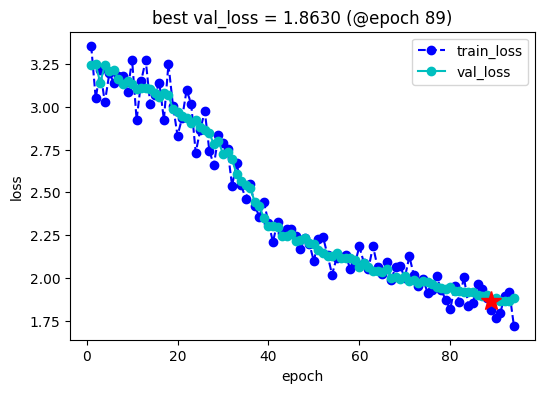

<<<<<< val_loss without improvement in 5 epoch,early stopping >>>>>>


,epoch,train_loss,lr,val_loss
0,1,3.357031,0.000002,3.242432
1,2,3.049609,0.000002,3.247314
2,3,3.213672,0.000002,3.141357
3,4,3.025391,0.000002,3.241455
4,5,3.195703,0.000002,3.211670
...,...,...,...,...
89,90,1.764063,0.000002,1.881348
90,91,1.793164,0.000002,1.863770
91,92,1.896289,0.000002,1.867188
92,93,1.917383,0.000002,1.865234


In [53]:
# 训练一百轮
# patience=5：早停策略的参数，用于防止模型在训练过程中过拟合。如果在连续的5轮训练中，验证损失（或者其他的指定指标）都没有改善，那么训练将会提前停止
# monitor='val_loss'：需要监控的指标：验证损失
# mode='min'：早停策略的参数，指定了改进的方向。'min'意味着指标（这里是验证损失）的最小值被视为改进
# mixed_precision='fp16'：这是一种混合精度训练的策略。在混合精度训练中，一部分张量的数据类型会被设为低精度（如半精度浮点数fp16），这样可以减少计算资源的需求，从而提高训练速度和效率
keras_model.fit(train_data = dl_train,
                val_data = dl_val,
                epochs=100,patience=5,
                monitor='val_loss',mode='min',
                ckpt_path = ckpt_path,
                mixed_precision='fp16'
               )

In [54]:
from peft import PeftModel
model = AutoModel.from_pretrained("THUDM/chatglm2-6b",
                                  load_in_8bit=False,
                                  trust_remote_code=True,
                                  device_map='auto')
model = PeftModel.from_pretrained(model,ckpt_path)
model = model.merge_and_unload() #合并lora权重

Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

In [71]:
def predict(text):
    response, history = model.chat(tokenizer, get_prompt(text), history=his,
    temperature=0.01)
    return response

In [72]:
predict('服用老鼠药可以治疗艾滋病')

"1. 使用逻辑链条的方式分析其真伪：\n该文本声称服用老鼠药可以治疗艾滋病，但没有提供任何支持这个结论的证据。目前还没有任何科学证据表明老鼠药可以治疗艾滋病，因此这个文本是谣言。\n2. 逐步提供验证的逻辑思路：\n要验证这个文本是否为谣言，我们需要寻找相关的证据来支持或反驳这个结论。然而，目前并没有证据表明老鼠药可以治疗艾滋病。因此我们需要更多的科学研究和数据来回答这个问题。\n3. 根据逻辑分析，将文本归类为：'尚无定论'、'证实为不真实'、'确实如此' 三种类型之一：\n根据我们的分析，这个文本缺乏足够的证据来证明服用老鼠药可以治疗艾滋病，因此我们将其归类为'尚无定论'。"

In [73]:
# 假设 dftest 是一个 DataFrame
dftest['predict_target'] = ''  # 新增 predict_target 列，初始为空字符串

patterns = ['尚无定论', '证实为不真实', '确实如此']

for i in tqdm(range(len(dftest))):
    text = dftest['context'].iloc[i]
    prediction = predict(text)

    # 检查三种模式是否存在
    found = False
    for pattern in patterns:
        if pattern in prediction:
            dftest['predict_target'].iloc[i] = pattern
            found = True
            break  # 如果找到其中一个匹配，就跳出循环

    if not found:
        dftest['predict_target'].iloc[i] = '模型生成异常'

100%|██████████| 31/31 [01:31<00:00,  2.94s/it]


In [74]:
dftest.head()

,context,target,predict_target,contains
0,[Round 1]\n\n问：\n谣言验证任务：对下列网络文本进行谣言分析。您需要：\n1....,拆解结果：\n1. 验证文本中提到的“北京即将封城”是否属实。\n2. 验证文本中提到的“1...,模型生成异常,False
1,[Round 1]\n\n问：\n谣言验证任务：对下列网络文本进行谣言分析。您需要：\n1....,拆解结果：\n\n1. 验证钟南山院士是否曾给出盐水漱口防病毒的建议：无\n2. 验证广州医...,证实为不真实,True
2,[Round 1]\n\n问：\n谣言验证任务：对下列网络文本进行谣言分析。您需要：\n1....,拆解结果：\n1. 对研究是否由美国疾控中心发布进行验证。\n2. \n - 研究指出N...,尚无定论,False
3,[Round 1]\n\n问：\n谣言验证任务：对下列网络文本进行谣言分析。您需要：\n1....,拆解结果：\n1. 对市场声称增强免疫力的药物/保健品缺乏临床依据进行验证。\n2. 验证增...,尚无定论,False
4,[Round 1]\n\n问：\n谣言验证任务：对下列网络文本进行谣言分析。您需要：\n1....,拆解结果：\n1. 使用对研究是否被同行评议、研究内容及验证数据的检验方式分析其真伪。\n2...,证实为不真实,False


In [75]:
# 计算target列中的文本是否包含predict列中的文本
dftest['contains'] = dftest.apply(lambda row: row['predict_target'] in row['target'], axis=1)

# 计算占比
percentage_contains = dftest['contains'].mean()

percentage_contains



0.2903225806451613